# Домашнее задание 2

(прислать до 02:00 15.02.2021)

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1 (12 pts)
В этой задаче Вам предлагается выяснить, как можно ускорить сходимость градиентного спуска.

- (1  pts) Рассмотрите задачу минимизации дифференцируемой функции $f(x): X \to \mathbb{R}$ и напишите для неё шаг градиентного спуска

- Пусть задано некоторое невырожденое линейное преобразование $P^{1/2}: X \to Y$. 
Перенесём решение исходной задачи из пространства $X$ в пространство $Y$ с помощью вспомогательной функции 

$$
g(y) = f(P^{-1/2}y) = f(x)
$$

- (3 pts) Запишите шаг градиентного спуска в переменных $y$ и найдите выражение для $g'(y)$ через переменные $x$.

- (1 pts) Проверьте инвариантен ли градиент при линейном преобразовании?

- (2 pts) Преобразуйте выражение для шага градиентного спуска в пространстве $Y$ так, чтобы в нём фигурировали только исходные координаты, то есть отобразите его обратно в пространство $X$

- (5 pts) Исследуйте сходимость градиентного спуска для задачи 

$$
\min e^{x_1 + 3x_2 - 0.1} + e^{-x_1 - 0.1} + e^{x_1 - 3x_2 - 0.1},
$$

используя преобразования координат

$$
P_1 =
\begin{bmatrix}
3 & 0\\
0 & 10
\end{bmatrix}
\quad
P_2 =
\begin{bmatrix}
10 & 0\\
0 & 3
\end{bmatrix}.
$$

Параметры для поиска шага и начальную точку выберите самостоятельно. Достаточно использовать условие достаточного убывания.
Постройте график сходимости аналогичный тем, что были показаны на семинаре для каждого преобразования. Используйте нормы градиента как критерий сходимости. Какое преобразование привело к ускорению сходимости и почему? Обратите внимание на оформление графиков.

**Решение**

**Пункт 1**

$$x_{k+1} = x_k - \alpha_k f'(x_k)$$

Где $\alpha > 0$.

**Пункт 2**

$$y_{k+1} = y_k - \alpha_k g'(y)$$

$g'(y) = (f(P^{-1}y))'$, дифференцирование по переменной $y$.
По правилу дифференцироавния сложной функции $(f(P^{-1}y))' = J^{\top} f'(P^{-1}y) = (P^{-1})^{\top}f'(x) = P^{-\top}f'(x)$.

**Пункт 3**

Как видим из предыдущего пункта, градиент домножается на $P^{-\top}$. Поэтому он инвариантен только в случае если $P$ ортогональная.

**Пункт 4**

$$y_{k+1} = y_k - \alpha_k g'(y)$$

$$Px_{k+1} = Px_k - \alpha_k P^{-\top}f'(x_k)$$

$$x_{k+1} = x_k - \alpha_k ( P^{-\top})^{-1}f'(x_k) = x_k - \alpha_k P^{\top}f'(x_k)$$

Реализуем градиентный спуск. Коэффициент $\alpha$ сделаем постоянным. Попробовав нескольо значений (в коде и на графиках приведено только $\alpha = \frac{1}{40}$), убеждаемся, что во всех случаях для второй матрицы метод сходится быстрее.

In [69]:
import numpy as np

P1 = np.mat([[3, 0], [0, 10]])
P2 = np.mat('10 0; 0 3')
P = [P1, P2]
alpha = 1 / 40

grad_list = [[], []]
for i in range(2):
    norm = 1
    x = np.mat('0; 0')
    iter = 0
    while norm > 1e-6:
        iter += 1
        grad1 = np.exp(x[0, 0]+3*x[1, 0]-0.1)-np.exp(-x[0, 0]-0.1)+np.exp(x[0, 0]-3*x[1, 0]-0.1)
        grad2 = 3*np.exp(x[0, 0]+3*x[1, 0]-0.1)-3*np.exp(x[0, 0]+-3*x[1, 0]-0.1)
        grad = np.mat([[grad1], [grad2]])
        x = x - alpha*P[i]*grad
        norm = np.linalg.norm(grad)
        grad_list[i].append(norm)
        #print(norm)
    print(iter)

66
15


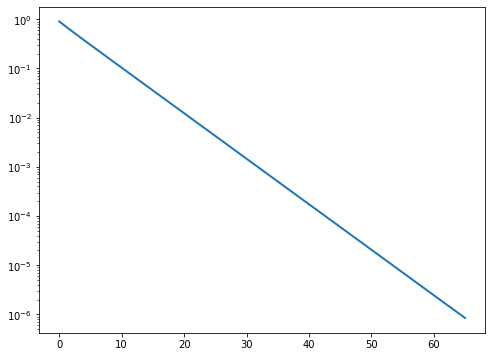

In [70]:
import matplotlib.pyplot as plt # k = 100, a = 1/k

plt.figure(figsize=(8,6))
plt.semilogy(grad_list[0], label=r"$\|f'(x_k)\|^{CG}_2$", linewidth=2)

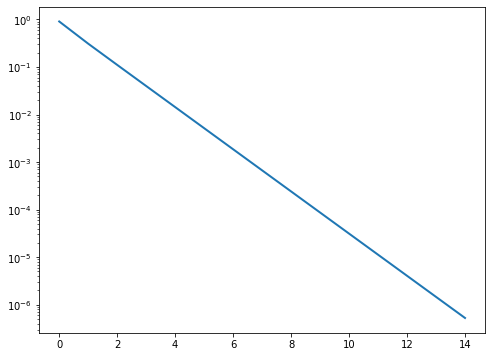

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.semilogy(grad_list[1], label=r"$\|f'(x_k)\|^{CG}_2$", linewidth=2)

## Задача 2 (10 pts)

- (2 pts) Покажите, что градиенты, полученные на двух последовательных шагах градиентного спуска с использованием правила наискорейшего спуска, ортогональны.

- (5 pts) Докажите, что если целевая функция $f(x) = \frac{1}{2}x^{\top}Qx - b^{\top}x$, $Q \in \mathbb{S}^n_{++}$, шаг определяется с помощью наискорейшего спуска и $x^0 - x^*$ параллелен собственному вектору матрицу $Q$, то градиентный спуск сходится за один шаг. 

- Покажите, что для $f(x) = x^{\top}x$ градиентный спуск с выбором шага по правилу наискорейшего спуска сходится за одну итерацию:
    - (1 pts) с использованием предыдущего утверждения
    - (2 pts) прямым вычислением 

**Решение**

**Пункт 1**

Предположим, что градиенты, полученные на двух последовательных шагах градиентного спуска с использованием правила наискорейшего спуска, не ортогональны. То есть $\langle f'(x_k), f'(x_{k+1}) \rangle = \alpha \neq \mathbf{0}$. Рассмотрим единичный вектор направления $\mathbf{d}$, такой что

* $\mathbf{d} = \frac{f'(x_k)}{\|f'(x_k)\|}$, если $\alpha < 0$
* $\mathbf{d} = -\frac{f'(x_k)}{\|f'(x_k)\|}$, если $\alpha > 0$

Тогда производная по направлению $f'(x_{k+1}, \mathbf{d}) = \langle \mathbf{d}, f'(x_{k+1}) \rangle < 0$. То есть, функция убывает по направлению $\mathbf{d}$, которое параллельно направлению градиента в точке $x_k$. Но это значит, что в окрестности точки $x_{k+1}$ существует такая точка, в которой значение функции $f$ меньше, чем $f(x_k)$. Это противоречит тому что мы выбирали $x_{k+1}$ как $\arg\min\limits_{\alpha > 0} f(x_k-\alpha f'(x_k))$. Значит, $\langle f'(x_k), f'(x_{k+1}) \rangle =  \mathbf{0}$.

**Пункт 2**

Если $Q$ --- симметричная матрица, то $f'(x) = Qx-b$. $f''(x) = Q \in \mathbb{S}^n_{++}$, значит, функция $f$ выпукла при всех $x$ и точка $x^*$, в которой $f'(x^*) = \mathbf{0}$ является точкой минимума.

Если $x_0-x^*$ --- собственный вектор, то $Q(x_0-x^*) = \lambda (x_0-x^*)$. В силу положительной определённости матрицы $Q$ имеем $\lambda >0$. Тогда $f'(x_0) = Qx_0-b = Q(x_0-x^*) + Qx^*-b = \lambda (x_0-x^*)$ ($f'(x^*)  = Qx^*-b = \mathbf{0}$ --- необходимое условие экстремума). Тогда $\alpha = \arg\min\limits_{\alpha > 0} f(x_0-\alpha f'(x_0)) = \arg\min\limits_{\alpha > 0} f(x_0-\alpha \lambda (x_0-x^*)) = \frac{1}{\lambda}$, $x_1 = x_0 - \alpha f'(x_0) = x^*$.

**Пункт 3**

- $f(x) = x^{\top}x$, в этом случае $Q=I$, а для единичной матрицы любой вектор собственный, а значит, $\forall x_0\ \ \ x_0-x^*$ --- тоже собственный вектор, и, используя результат предыдущего пункта, можно сказать, что для любого $x_0$ наискорейший градиентный спукс сойдётся за 1 шаг.

- Вычислим тепрь это "в лоб". $x^{\top}x = \sum x_i^2 \geq 0$, поэтому минимум достигается в точке $x^* = \mathbf{0}$. При этом $f'(x) = x$ и $\alpha = \arg\min\limits_{\alpha > 0} f(x_0-\alpha f'(x_0)) = \arg\min\limits_{\alpha > 0} f(x_0-\alpha x_0) = 1$. $x_1 = x_0 - \alpha f'(x_0) = \mathbf{0}$.


## Задача 3 (10 pts)

- (6 pts) Решите задачу наискорейшим спуском

$$
\frac{1}{2}x^{\top}Ax - b^{\top}x \to \min_x
$$

при 

$$
A = 
\begin{bmatrix}
0.78 & −0.02 & −0.12 & −0.14\\
−0.02 & 0.86 & −0.04 & 0.06 \\
−0.12 & −0.04 & 0.72 & −0.08\\
−0.14 & 0.06 & −0.08 & 0.74
\end{bmatrix}
\qquad
b = \begin{bmatrix}
0.76\\
0.08\\
1.12\\
0.68
\end{bmatrix}
$$

и начальной точкой $x^0 = 0$ с точностью по норме градиента $10^{-6}$. 

- (2 pts) Постройте график сходимости, насколько сходимость быстрая? 
- (2 pts) Найдите спектр матрицы $A$ (покажите, как Вы его искали) и сравните полученный график сходимости с графиком сходимости, полученным из теоретических соображений (из теорем сходимости градиентного спуска).

Выведем явную формулу для $\alpha_k$.

В пункте 3 мы нашли собственные значения, и они оказались положительные, значит, матрица $A$ положительно определена. 

$$f'(x) = Ax-b$$

$$x_{k+1} = x_k - \alpha_k f'(x_k)$$

$$\alpha_k = \arg\min\limits_{\alpha > 0} f(x_k - \alpha f'(x))$$

$$ f(x_k - \alpha f') = \frac{1}{2}(x_k-\alpha f')^{\top}A(x_k-\alpha f') - b^{\top}(x_k-\alpha f') =\frac{\alpha^2}{2}(f')^{\top}Af' +\alpha(-\frac{1}{2}x^{\top}_kAf' -\frac{1}{2}(f')^{\top}Ax_k+b^{\top}f')+\frac{1}{2}x_k^{\top}Ax_k-b^{\top}x_k$$

Это квадратный трёхчлен с положительным старшим коэффициентом относительно $\alpha$. Он достигает минимума в точке $\frac{(x_k^{\top}A-b^{\top})f'(x_k)}{(f'(x_k))^{\top}Af'(x_k)}$.

In [24]:
import numpy as np

A  = np.mat('0.78 -0.02 -0.12 -0.14; -0.02 0.86 -0.04 0.06; -0.12 -0.04 0.72 -0.08; -0.14 0.06 -0.08 0.74')
b = np.mat('0.76; 0.08; 1.12; 0.68')
x = np.mat('0; 0; 0; 0')

grad_list = []
norm = 1
while norm > 1e-10:
    grad = A*x-b
    alpha = ((x.T*A-b.T)*grad)[0,0] / (grad.T*A*grad)[0,0]
    x = x - alpha*grad
    norm = np.linalg.norm(grad)
    grad_list.append(norm)
    print(norm)

1.5168388180686834
0.16932173460543998
0.018030898127804635
0.0045223652902800365
0.0011374384676498283
0.0002959845031456362
7.495760100749776e-05
1.95165882401686e-05
4.942963507408218e-06
1.2870000024919679e-06
3.259586319107512e-07
8.486989496695434e-08
2.149500785662428e-08
5.5966582305587665e-09
1.4174663358204835e-09
3.690657284256768e-10
9.347348046915596e-11


Построим график. Как видно, сходимость линейная.

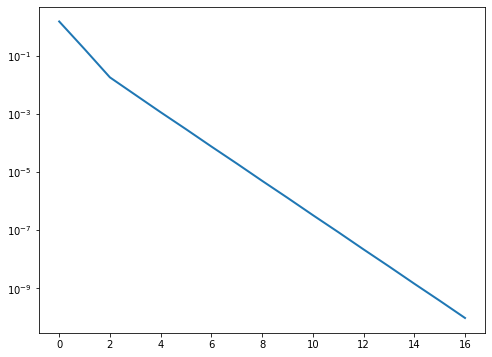

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.semilogy(grad_list, label=r"$\|f'(x_k)\|^{CG}_2$", linewidth=2)

In [22]:
Lam, Vec = np.linalg.eig(A)
print(Lam)

[0.52 0.94 0.88 0.76]
